In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

WIDTH = 28

In [34]:
figure = [(205, 145), (198, 153), (179, 170), (145, 199), (112, 227), (85, 249), (76, 257), (76, 257), (77, 257), (80, 256), (97, 256), (139, 259), (200, 264), (259, 267), (297, 266), (309, 260), (310, 254), (310, 247), (310, 237), (305, 224), (289, 205), (264, 179), (230, 154), (194, 139), (176, 134), (175, 134)]

x = [i[0] for i in figure]
y = [i[1] for i in figure]
center = (np.mean(x), np.mean(y))

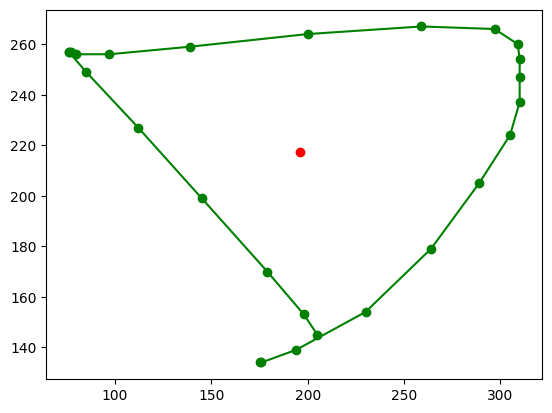

In [35]:
plt.plot(x, y, marker="o", c="g")
plt.scatter(center[0], center[1], color="red") # plotting single point
plt.show()

# Посмотрит на расстояние до центра

Нормализуем расстояния, чтобы дальнейшие расчеты не зависили от размера фигуры

In [84]:
def euclidian_distance(first, second):
    return math.sqrt((second[0] - first[0])**2 + (second[1] - first[1])**2)

def normalization(figure, center, integer=False):
    res_figure = [None] * len(figure)
    min_x = min([i[0] for i in figure])
    min_y = min([i[1] for i in figure])

    for i in range(len(figure)):
        res_figure[i] = (figure[i][0] - min_x, figure[i][1] - min_y)

    # Оставить свободное место, поэтому - 4
    koef_x = (WIDTH - 6) / max([i[0] for i in res_figure])
    koef_y = (WIDTH - 6) / max([i[1] for i in res_figure])

    koef = koef_x if koef_x <= koef_y else koef_y
    for i in range(len(figure)):
        if integer:
            res_figure[i] = (int(res_figure[i][0] * koef + 2), int(res_figure[i][1] * koef + 2))
        else:
            res_figure[i] = (res_figure[i][0] * koef + 2, res_figure[i][1] * koef + 2)
        
    
    return res_figure, ((center[0] - min_x) * koef, (center[1] - min_y) * koef)

In [62]:
figure_norm, center_norm = normalization(figure, center)

In [ ]:
distances = [euclidian_distance(i, center_norm) for i in figure_norm]
indexes = list(range(len(distances)))
plt.plot(indexes, distances, marker="o", c="g")
plt.show()

# Конвертировать в изображение

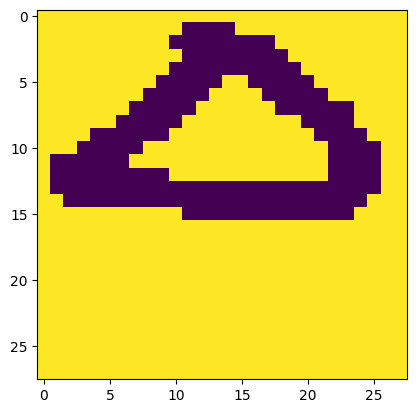

255

In [85]:
import cv2
def convert_to_image(figure, center):
    res_figure, _ = normalization(figure, center, integer=True)
    blank_image = np.zeros((WIDTH, WIDTH), np.uint8)
    blank_image[:, :] = 255
    for i in range(len(res_figure) - 1):
        cv2.line(blank_image, res_figure[i], res_figure[i+1], 0, 2)
    return blank_image

blank_image = convert_to_image(figure, center)
plt.imshow(blank_image)
plt.show()
blank_image[27][15]

In [25]:
cv2.imwrite("da.jpg", blank_image)

True

# Обучение NN

In [112]:
import os
import cv2

DATA_PATH = "Dataset/"
labels = {"Circle": 0, "Nothing": 1, "Square": 2, "Triangle": 3}
class_names = list(labels.keys())
x = []
y = []

for label in os.listdir(DATA_PATH):
    print(label)
    path = os.path.join(DATA_PATH, label)
    for i in os.listdir(path):
        im_gray = cv2.imread(os.path.join(path, i), cv2.IMREAD_GRAYSCALE) # read as grayscale
        im_bw = cv2.threshold(im_gray, 127, 1, cv2.THRESH_BINARY)[1] # convert to binary
        x.append(im_bw)
        y.append(labels[label])

x = np.array(x)
y = np.array(y)

Circle
Nothing
Square
Triangle


In [87]:
x.shape, y.shape

((216, 28, 28), (216,))

In [ ]:
x[0]

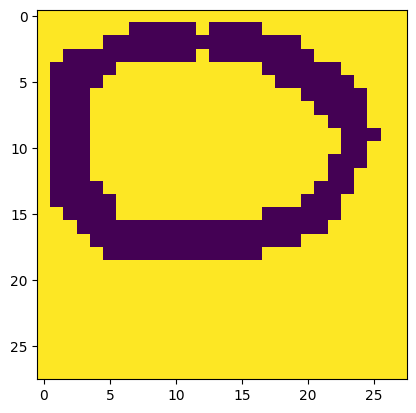

In [89]:
plt.imshow(x[0])
plt.show()

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = {}

for i in range(len(labels)):
    class_weight[i] = weights[i]

class_weight

{0: 1.170731707317073, 1: 0.96, 2: 1.0666666666666667, 3: 0.8571428571428571}

In [99]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((186, 28, 28), (47, 28, 28), (186,), (47,))

# Базовая архитектура

In [114]:
import keras
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])


In [115]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.33, batch_size=32)

Epoch 1/30
2/2 [==============================] - 0s 125ms/step - loss: 1.5289 - accuracy: 0.3111 - val_loss: 1.3242 - val_accuracy: 0.5217
Epoch 2/30
2/2 [==============================] - 0s 23ms/step - loss: 1.1784 - accuracy: 0.5333 - val_loss: 1.3006 - val_accuracy: 0.4783
Epoch 3/30
2/2 [==============================] - 0s 24ms/step - loss: 1.0631 - accuracy: 0.6000 - val_loss: 1.3510 - val_accuracy: 0.4348
Epoch 4/30
2/2 [==============================] - 0s 26ms/step - loss: 1.0255 - accuracy: 0.5333 - val_loss: 1.1304 - val_accuracy: 0.5217
Epoch 5/30
2/2 [==============================] - 0s 20ms/step - loss: 0.8618 - accuracy: 0.7111 - val_loss: 1.0744 - val_accuracy: 0.5652
Epoch 6/30
2/2 [==============================] - 0s 25ms/step - loss: 0.8030 - accuracy: 0.6889 - val_loss: 1.0816 - val_accuracy: 0.5652
Epoch 7/30
2/2 [==============================] - 0s 22ms/step - loss: 0.7319 - accuracy: 0.8222 - val_loss: 1.0595 - val_accuracy: 0.5217
Epoch 8/30
2/2 [==========

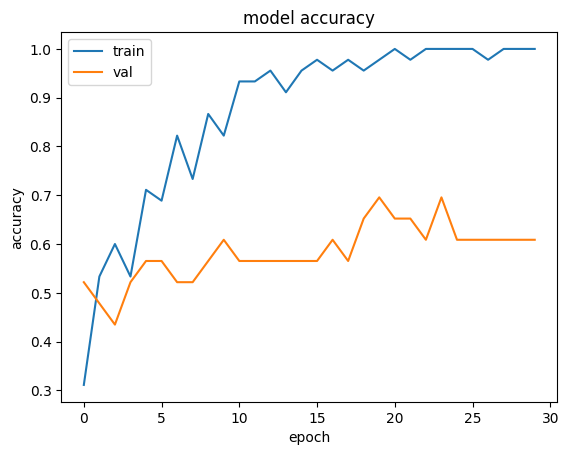

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [118]:
model.save('model/first.keras')

In [12]:
from sklearn import metrics
# predictions = model.predict(np.array(x_test))
# y_pred = []
# for i in range(len(y_test)):
#     y_pred.append(np.argmax(predictions[i]))


def show_confusion_matrix(y_pred):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred), display_labels = class_names)
    cm_display.plot()
    plt.show()

# show_confusion_matrix(y_pred)

# Архитектура №2

In [114]:
import keras
import tensorflow as tf

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.45),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.45),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

model_2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

history_2 = model_2.fit(x_train, y_train, epochs=50, validation_split=0.33, batch_size=32, class_weight=class_weight)

Epoch 1/50
4/4 [==============================] - 0s 46ms/step - loss: 1.5324 - accuracy: 0.2422 - val_loss: 1.3681 - val_accuracy: 0.3750
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 1.5451 - accuracy: 0.2188 - val_loss: 1.2640 - val_accuracy: 0.4219
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 1.2625 - accuracy: 0.4219 - val_loss: 1.2094 - val_accuracy: 0.4844
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 1.4012 - accuracy: 0.3281 - val_loss: 1.1462 - val_accuracy: 0.6250
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 1.2059 - accuracy: 0.4531 - val_loss: 1.1013 - val_accuracy: 0.6094
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 1.2021 - accuracy: 0.4531 - val_loss: 1.0524 - val_accuracy: 0.6719
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 1.1107 - accuracy: 0.4922 - val_loss: 1.0106 - val_accuracy: 0.7812
Epoch 8/50
4/4 [=================

In [115]:
model_2.save('model/first.keras')

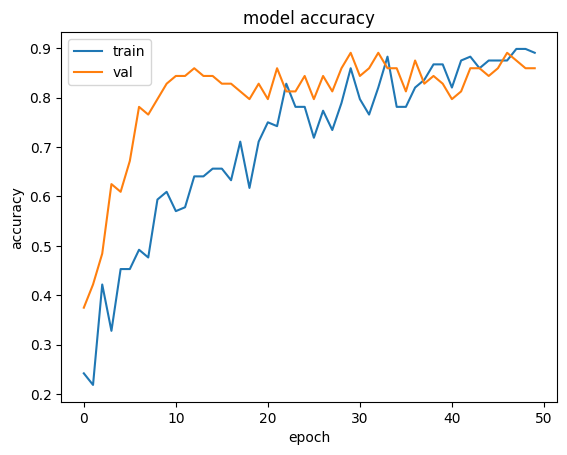

In [116]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

2/2 [==============================] - 0s 3ms/step


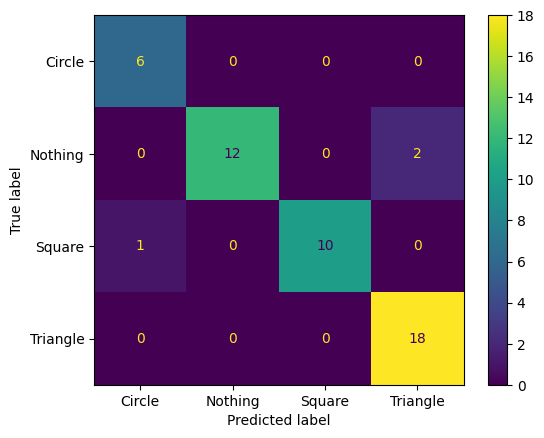

In [117]:
predictions = model_2.predict(np.array(x_test))
y_pred = []
for i in range(len(y_test)):
    y_pred.append(np.argmax(predictions[i]))

show_confusion_matrix(y_pred)

In [134]:
len(x_test), len(y_test)

(17, 17)